### Sentiment analysis
Naive Bayes models are very useful when we want to analyze sentiment, classify texts into topics or recommendations, as the characteristics of these challenges meet the theoretical and methodological assumptions of the model very well.

In this project you will practice with a dataset to create a review classifier for the Google Play store.

#### Carga del dataset

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [2]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


(891, 3)

### Preparación del set de datos

In [3]:
data.drop(columns="package_name", inplace=True) #Eliminando la columna package name como es requerido 
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    891 non-null    object
 1   polarity  891 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


(891, 2)

In [4]:
data["review"] = data["review"].str.lower().str.strip()
print(data.head())

                                              review  polarity
0  privacy at least put some option appear offlin...         0
1  messenger issues ever since the last update, i...         0
2  profile any time my wife or anybody has more t...         0
3  the new features suck for those of us who don'...         0
4  forced reload on uploading pic on replying com...         0


### División de train y test

In [5]:
#Dividiendo el set en train y test
from sklearn.model_selection import train_test_split

X = data['review']
y = data['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
Name: review, dtype: object

In [6]:
X_train

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
                             ...                        
106    why can't i share my achievements? recently di...
270    beta is the best version of the chrome browser...
860    great little game. this is a great little game...
435    keeps crashing ever since i started using it m...
102    even though i am loving the new update, but th...
Name: review, Length: 712, dtype: object

In [7]:
#Transform the text into a word count matrix. This is a way to obtain numerical features from the text. For this, we use the training set to train the transformer and apply it in test:
from sklearn.feature_extraction.text import CountVectorizer
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()


In [8]:
print(vec_model.vocabulary_)

{'just': 1550, 'did': 822, 'latest': 1611, 'update': 3070, 'viber': 3129, 'problems': 2208, 'send': 2539, 'messages': 1801, 'try': 2995, 'make': 1741, 'saying': 2491, 'ringing': 2431, 'sound': 2685, 'don': 874, 'think': 2915, 'actually': 105, 'answers': 187, 'calls': 454, 'time': 2937, 'updates': 3074, 'doesn': 869, 'work': 3235, 'fix': 1113, 'asap': 236, 'england': 971, 'thank': 2901, 'keeps': 1556, 'crashing': 706, 'works': 3238, 'extreme': 1045, 'data': 750, 'savings': 2488, 'mode': 1839, 'high': 1361, 'websites': 3187, 'dont': 877, 'load': 1676, 'moving': 1857, 'browser': 411, 'fail': 1058, 'boat': 368, 'arrived': 231, 'version': 3125, 'touted': 2968, 'advanced': 129, 'fact': 1056, 'contains': 664, 'big': 339, 'old': 1977, 'disappointment': 847, 'widget': 3209, 'wasn': 3172, 'available': 269, 'google': 1245, 'urged': 3089, 'switch': 2831, 'sms': 2652, 'function': 1187, 'hangouts': 1309, 'longer': 1693, 'wth': 3256, 'want': 3167, 'use': 3094, 'app': 199, 'messaging': 1802, 'quick': 

In [9]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Selección de Modelo

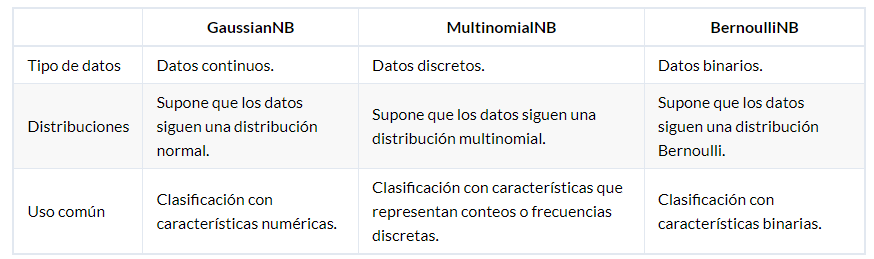

Tomando en cuenta la tabla anterior, se considera que el modelo Multinomial es la mejor opción para este problema por lo siguiente:
- Como se puede observar en el documento, al utilizar CountVectorizer se crea una matriz contadora de tokens, que implica contabilizar la aparición de las palabras detectadas.
- Según la información antes presentada, el mejor modelo para clasificación que implica que las características sean valores discretos o de frecuencia, es el MultinomialNB().

Notas: 
- Se descarta GaussianNB porque las características no son continuas, además de que la clasificación no depende de números, sino de frecuencias.
- Se descarta Bernoulli porque las características no son binarias.

### Implementación del modelo


In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8156424581005587

El accuracy obtenido utilizando MultinomialNB es de 0.8156, un buen resultado con el que podría considerarse un modelo funcional.
Se procede a crear los otros dos modelos para confirmar si la elección fue adecuada o no.

### GaussianNB

In [13]:
from sklearn.naive_bayes import GaussianNB

modelG = GaussianNB()
modelG.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = modelG.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0])

In [15]:
accuracy_score(y_test, y_pred)

0.8044692737430168

### BernoulliNB

In [16]:
from sklearn.naive_bayes import BernoulliNB

modelB = BernoulliNB()
modelB.fit(X_train, y_train)

BernoulliNB()

In [17]:
y_pred = modelB.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [18]:
accuracy_score(y_test, y_pred)

0.770949720670391

### Conclusión

El modelo elegido inicialmente fue el que mejor puntaje de accuracy obtuvo, por lo que se concluye que MultinomialNB es el mejor modelo para este caso.
En segundo lugar queda Gaussian, y por último Bernoulli

### Optimización del modelo

Una vez que se tienen los resultados base, se intentará realizar la optimización de parámetros para obtener un mejor score utilizando Random Search

In [19]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "alpha": np.linspace(0.5,1,4,10,100),
    "fit_prior": [True, False]
}
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': (array([0.5       , 0.66666667, 0.83333333, 1.        ]),
                                                  np.float64(0.16666666666666666)),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

In [20]:
random_search.fit(X_train, y_train)
random_search.best_params_

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 763, in fit
    alpha = self._check_alpha()
  File "/home/vscode

{'fit_prior': True, 'alpha': np.float64(0.16666666666666666)}

In [21]:
modelO = MultinomialNB(fit_prior=True,alpha=0.16666666666666666)
modelO.fit(X_train, y_train)

MultinomialNB(alpha=0.16666666666666666)

In [22]:
y_pred = modelO.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [23]:
accuracy_score(y_test, y_pred)

0.8268156424581006

Después de hacer random search, podemos observar que el accuracy del modelo mejoró, por lo que el mejor modelo es el optimizado

### Guardar modelo

In [24]:
from pickle import dump

dump(modelO, open("/workspaces/NaiveBayes/models/NaiveBayesOpt.sav", "wb"))

Modelos alternativa

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(random_state = 42)
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = modelRF.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [30]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [31]:
random_grid = {"max_depth" : [4,8,10,30,50,100,120],
                'min_samples_split' : [10,30,50,100,150],
                'min_samples_leaf' : [10,30,50,100,150],
               'max_features': [None, 'sqrt','log2'],
               'n_estimators': [100,150,180,200]}

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   random_grid)
random_search.fit(X_train, y_train)
print("best: ",random_search.best_params_)

best:  {'n_estimators': 180, 'min_samples_split': 100, 'min_samples_leaf': 30, 'max_features': None, 'max_depth': 4}


In [32]:
modelRF = RandomForestClassifier(random_state=42,max_depth=4, max_features=None, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=180)

modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=None, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=180,
                       random_state=42)

In [33]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [34]:
accuracy_score(y_test, y_pred)

0.7988826815642458

Boosting Algorith

In [35]:
from xgboost import XGBClassifier

modelBA = XGBClassifier(random_state = 42)
modelBA.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [36]:
y_pred = modelBA.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [37]:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [38]:
import scipy.stats as stats

param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

random_search = RandomizedSearchCV(modelBA, random_state=42,param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)

Best set of hyperparameters:  {'learning_rate': np.float64(0.08851759613930137), 'max_depth': 5, 'n_estimators': 157, 'subsample': np.float64(0.7571172192068059)}


In [39]:
modelBA = XGBClassifier(random_state = 42,learning_rate = 0.08851759613930137, max_depth =  5, n_estimators = 157, subsample = 0.7571172192068059)
modelBA.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08851759613930137,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=157, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred = modelBA.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [41]:
accuracy_score(y_test, y_pred)

0.7988826815642458

### Conclusiones:

El modelo GaussianNB Optimizado es el modelo con el puntaje de accuracy más alto de entre los 3 lanzados. Si bien en su forma base el puntaje fue menor, aún puede considerarse aceptable, pero después de la optimización mostró gran mejoría, alcanzando 0.8261.

El segundo mejor modelo es el XGB Classifier en su forma base, con un puntaje de 0.81564. Los otros modelos quedaron por debajo de los 80 puntos.

Si se debe elegir un modelo para resolver este tipo de problemas, en este caso, el GaussianNB es el indicado.